# **Tarea 7** 🖼️ - Stable Diffusion

Sigue los pasos descritos en el vídeo:

https://www.youtube.com/watch?v=5z223SxlAcA

---

## ¿Qué es Stable Diffusion?

**Stable Diffusion** es un modelo de difusión latente, una especie de red neuronal generativa de aprendizaje profundo de texto a imagen lanzado en 2022. Se utiliza principalmente para generar imágenes detalladas condicionadas a descripciones de texto, aunque también se puede aplicar a otras tareas como pintar, pintar y generar traducciones de imagen a imagen guiadas por un mensaje de texto. 

Fue desarrollado por la start-up Stability AI en colaboración con varios investigadores académicos y organizaciones sin fines de lucro. Su código y pesos de modelo han sido lanzados públicamente, y puede ejecutarse en la mayoría de hardware equipados con una GPU con al menos 8 GB de VRAM. Esto marcó una desviación de los modelos anteriores de texto a imagen patentados, como DALL-E y Midjourney, a los que solo se podía acceder a través de servicios en la nube.

- [Wikipedia](https://en.wikipedia.org/wiki/Stable_Diffusion)

## Modelo a utilizar:

**Stable Diffusion v1-5 Model Card**:

El punto de control Stable-Diffusion-v1-5 se inicializó con los pesos del punto de control Stable-Diffusion-v1-2 y posteriormente se ajustó en pasos de 595k a resolución 512x512 en "laion-aesthetics v2 5+" y 10% de caída del acondicionamiento de texto para mejorar el muestreo de guía sin clasificador.

Proporcionado por la página [Hugging Face](https://huggingface.co/runwayml/stable-diffusion-v1-5), que es plataforma que permite a los usuarios compartir modelos y conjuntos de datos de aprendizaje automático.

## A continuación, se presenta un ejemplo de código a modo de ilustración.

### Configuración

Usar el tiempo de ejecución de GPU para ejecutar el notebook, de modo que la inferencia sea mucho más rápida. En el menú de arriba `Tiempo de ejecución` y seleccione `Cambiar tipo de tiempo de ejecución` a `GPU`.

In [ ]:
# Información sobre las GPUs disponibles en el sistema

!nvidia-smi

Tue Apr 25 21:45:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Instalación de librerías

In [ ]:
!pip install diffusers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importación de librerías

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

In [ ]:
import warnings

# Silencia las advertencias
warnings.filterwarnings("ignore")

### Ejecución del código

In [ ]:
# Establece el ID del modelo en una variable
model_id = "runwayml/stable-diffusion-v1-5"

# Iinstancia de la clase StableDiffusionPipeline utilizando el modelo pre-entrenado especificado y el tipo de dato de torch
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

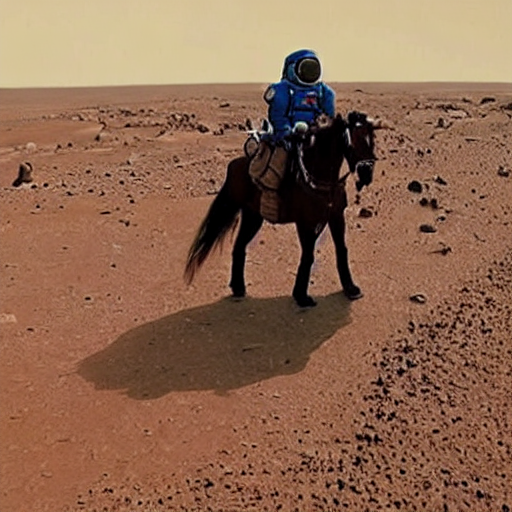

In [ ]:
# Mueve la instancia del modelo a la GPU, para tener una inferencia más rápida
pipe = pipe.to("cuda")

# Especificar el prompt, que es una cadena de texto que describe lo que se quiere generar
prompt = "a photo of an astronaut riding a horse on mars" # Ejemplo por defecto

# Pasar el prompt a través del modelo para generar la imagen
image = pipe(prompt).images[0]

# Guarda la imagen generada en un archivo PNG
image.save("image.png")

# Muestra la imagen generada
image

Prompt basado en esta [Noticia](https://www.larazon.es/tecnologia/imagenes-virales-papa-hechas-inteligencia-artificial-creadas-efecto-hongos-alucinogenos_2023032964244fc1a1722c0001b25208.html)

  0%|          | 0/50 [00:00<?, ?it/s]

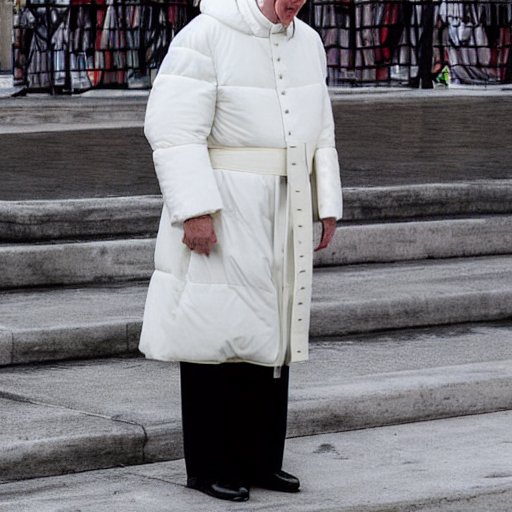

In [ ]:
prompt = "Pope Francis wearing a very big white Balenciaga drill rap puffy jacket, Hyper Realistic Photography"
image = pipe(prompt).images[0]
image

#### Ejemplo utilizando una imagen de referencia:

**Referencia**:

![Moonlight922](https://t2.genius.com/unsafe/409x409/https%3A%2F%2Fimages.genius.com%2F936899582d5be043f84ab24c8dea1b71.1000x1000x1.jpg)

Prompt utilizando la página [Image to Prompt](https://imagetoprompt.com/)

  0%|          | 0/50 [00:00<?, ?it/s]

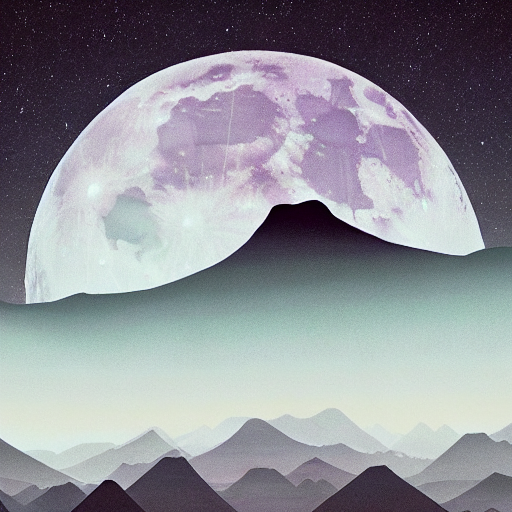

In [ ]:
prompt = "a full moon over a mountain with a sky background, an album cover by Ma Quan, reddit contest winner, cubo-futurism, luminescence, nightscape, chillwave"
image = pipe(prompt).images[0]
image